#### Code -1

- This code imports necessary libraries for manifold learning and visualization. It includes modules for handling time, plotting with matplotlib, numerical operations with numpy, manifold learning algorithms from scikit-learn, and a utility function for checking random state.

In [1]:
# Import necessary libraries
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold
from sklearn.utils import check_random_state

- These lines define variables used in manifold learning, specifying the number of neighbors and the number of samples in the dataset. These variables control aspects such as the neighborhood size for manifold algorithms and the size of the dataset to generate or load.

In [2]:
# Define variables for manifold learning
n_neighbors = 10
n_samples = 1000

- These lines create a synthetic dataset representing points on a sphere. They use a random state to ensure reproducibility and generate random values for the azimuthal angle p and the polar angle t within specified ranges. These angles are used to calculate the coordinates of points on the sphere.

In [3]:
# Create our sphere dataset
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

- These lines calculate the coordinates (x, y, z) of points on the sphere, excluding the poles. They use trigonometric functions to map the polar and azimuthal angles (t, p) to Cartesian coordinates (x, y, z). The colors of the points are also assigned based on the azimuthal angles.

In [4]:
# Sever the poles from the sphere
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

- These lines create a 3D plot of the dataset using matplotlib. The dataset consists of points on a sphere, and each point is represented by its Cartesian coordinates (x, y, z). The points are colored based on their azimuthal angles p, creating a rainbow colormap. The plot is displayed with a specific viewpoint (view_init) to provide a clear visualization of the spherical distribution of points. Additionally, the total number of points and the number of neighbors used in manifold learning are included in the plot title for reference.

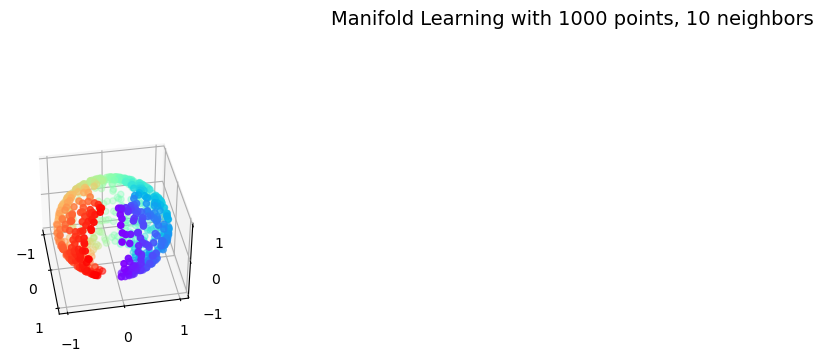

In [5]:
# Plot the dataset
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

- These lines perform Locally Linear Embedding (LLE) manifold learning using different methods: standard, local tangent space alignment (LTSA), Hessian LLE, and modified LLE. For each method, the dataset is transformed into a 2-dimensional space (n_components=2) using the specified method. The time taken for each transformation is measured (t0 and t1), and the results are printed. Additionally, scatter plots of the transformed data are created, with each subplot representing a different method. The colormap used for the scatter plots corresponds to the azimuthal angles of the original data points. Finally, axis formatters are set to null, and tight layout is applied to each subplot for better visualization.

standard: 0.22 sec
ltsa: 0.17 sec
hessian: 0.32 sec
modified: 0.2 sec


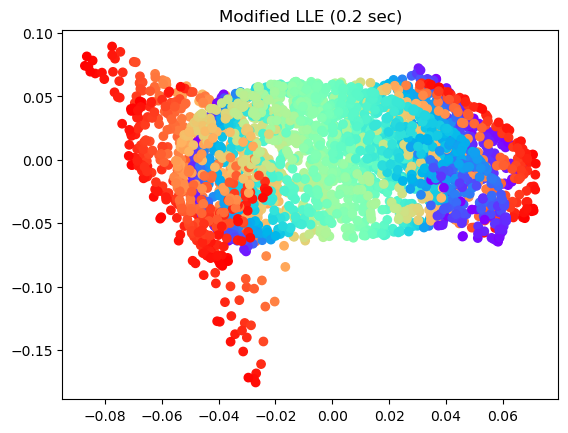

In [6]:
# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method, random_state=42
        )
        .fit_transform(sphere_data)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    plt.axis("tight")

- These lines perform Isomap manifold learning on the dataset. Isomap is another technique for dimensionality reduction and manifold learning. Similar to LLE, it also aims to preserve the local geometric structure of the data.

     - First, the time is recorded before the Isomap transformation (t0).
    - Then, the data is transformed into a 2-dimensional space using Isomap with the specified number of neighbors (n_neighbors=10) and components (n_components=2).
    - After the transformation, the time taken for the Isomap transformation is recorded (t1).
    - The results are printed, indicating the time taken for the transformation.
    - Additionally, a scatter plot of the transformed data is created, where each point is colored based on its azimuthal angle.
    - The subplot is added to the figure with appropriate formatting and a title indicating the method used and the time taken for the transformation.

ISO: 0.42 sec


(-2.102726160269737,
 2.161178746823232,
 -1.6159409090543826,
 1.6634384523595585)

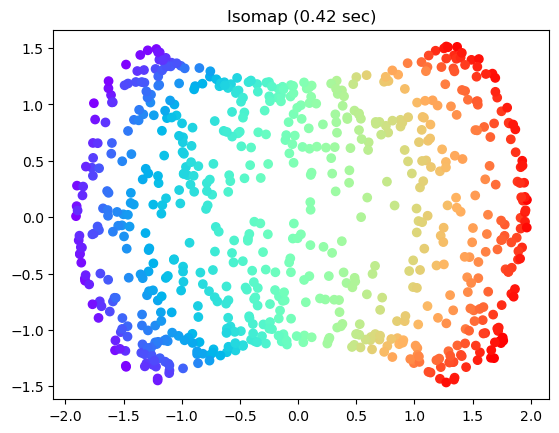

In [7]:
# Perform Isomap Manifold learning
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.axis("tight")

- These lines perform Multi-dimensional Scaling (MDS) on the dataset. MDS is a technique used for dimensionality reduction and manifold learning. It aims to preserve the pairwise distances between data points in the low-dimensional space.

    - First, the time is recorded before the MDS transformation (t0).
    - Then, an MDS object is initialized with 2 output dimensions, a maximum of 100 iterations, and a single initialization (n_init=1). A random state is set for reproducibility.
    - Next, the data is fitted and transformed using the MDS object.
    - After the transformation, the time taken for the MDS transformation is recorded (t1).
    - The results are printed, indicating the time taken for the transformation.
    - Additionally, a scatter plot of the transformed data is created, where each point is colored based on its azimuthal angle.
    - The subplot is added to the figure with appropriate formatting and a title indicating the method used and the time taken for the transformation.

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS: 1.6 sec


(-1.263950949715747,
 1.2290206840060933,
 -1.254768322069619,
 1.2586658737783085)

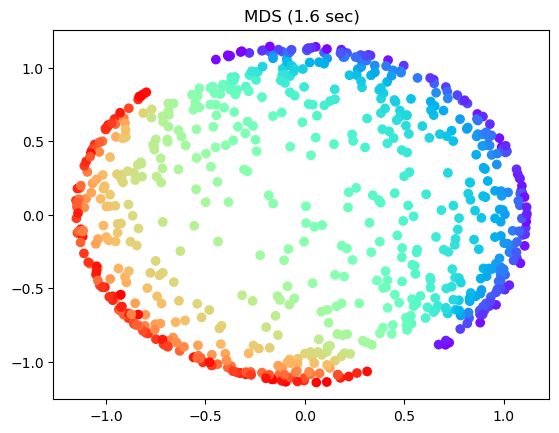

In [8]:
# Perform Multi-dimensional scaling (MDS)
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1, random_state=42)  # Initialize MDS
trans_data = mds.fit_transform(sphere_data).T  # Fit and transform the data
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))  # Print time taken for MDS

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.axis("tight")

- These lines perform Spectral Embedding on the dataset. Spectral Embedding is another technique for dimensionality reduction and manifold learning. It uses the spectral decomposition of the graph Laplacian matrix to embed the data into a lower-dimensional space.

    - First, the time is recorded before the Spectral Embedding transformation (t0).
    - Then, a SpectralEmbedding object is initialized with 2 output dimensions, the specified number of neighbors (n_neighbors=10), and a random state for reproducibility.
    - Next, the data is fitted and transformed using the SpectralEmbedding object.
    - After the transformation, the time taken for the Spectral Embedding transformation is recorded (t1).
    - The results are printed, indicating the time taken for the transformation.
    - Additionally, a scatter plot of the transformed data is created, where each point is colored based on its azimuthal angle.
    - The subplot is added to the figure with appropriate formatting and a title indicating the method used and the time taken for the transformation.

Spectral Embedding: 0.073 sec


(-0.01956140053392683,
 0.020986937321586078,
 -0.021241575164587762,
 0.023757166287276102)

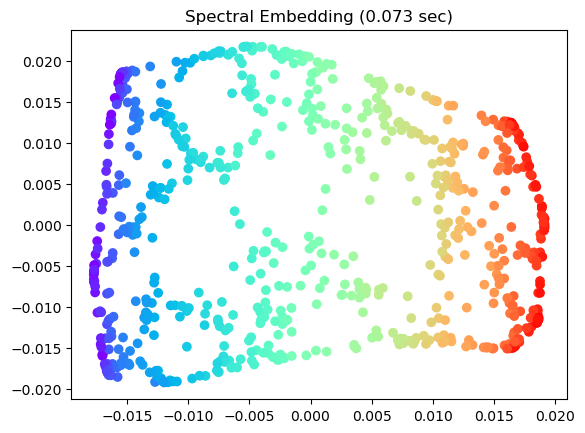

In [9]:
# Perform Spectral Embedding
t0 = time()
se = manifold.SpectralEmbedding(
    n_components=2, n_neighbors=n_neighbors, random_state=42
)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.axis("tight")

- These lines perform t-distributed stochastic neighbor embedding (t-SNE) on the dataset. t-SNE is a nonlinear dimensionality reduction technique particularly well-suited for visualization of high-dimensional data.

    - First, the time is recorded before the t-SNE transformation (t0).
    - Then, a TSNE object is initialized with 2 output dimensions and a random state for reproducibility.
    - Next, the data is fitted and transformed using the t-SNE object.
    - After the transformation, the time taken for the t-SNE transformation is recorded (t1).
    - The results are printed, indicating the time taken for the transformation.
    - Additionally, a scatter plot of the transformed data is created, where each point is colored based on its azimuthal angle.
    - The subplot is added to the figure with appropriate formatting and a title indicating the method used and the time taken for the transformation.

t-SNE: 1.9 sec


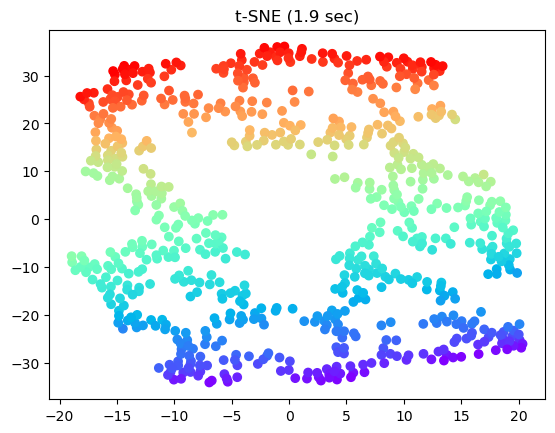

In [10]:
# Perform t-distributed stochastic neighbor embedding (t-SNE)
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=0)  # Initialize t-SNE
trans_data = tsne.fit_transform(sphere_data).T  # Fit and transform the data
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))  # Print time taken for t-SNE

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.axis("tight")

plt.show()

#### Code-2

- The code imports necessary libraries for data loading, visualization, preprocessing, dimensionality reduction, and manifold learning from scikit-learn. It includes functions for plotting, preprocessing data, and various embedding techniques such as Truncated SVD, Linear Discriminant Analysis, Isomap, Locally Linear Embedding, Spectral Embedding, t-SNE, and others.

In [11]:
# Import necessary libraries
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    MDS,
    TSNE,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

- The code loads the digits dataset from scikit-learn's datasets module. It specifically loads the digits dataset with 6 classes. The variable X contains the data features, while y contains the corresponding target labels. The number of samples (n_samples) and features (n_features) are determined from the shape of the data. Additionally, the variable n_neighbors is set to 30, which will be used in certain embedding techniques.

In [12]:
# Load the digits dataset with 6 classes
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

- This block of code creates a 10x10 grid of subplots to visualize a selection of images from the digits dataset. It iterates over the axes (subplots) using enumerate(axs.ravel()) to flatten the 10x10 grid into a 1D array. For each subplot, it displays an image reshaped from the flattened 64-dimensional feature vector into an 8x8 grid using imshow. The color map plt.cm.binary is used for displaying black and white images. The axes are turned off using ax.axis("off") to remove axis labels and ticks. Finally, a title is added to the figure using fig.suptitle to indicate that it shows a selection from the digits dataset.

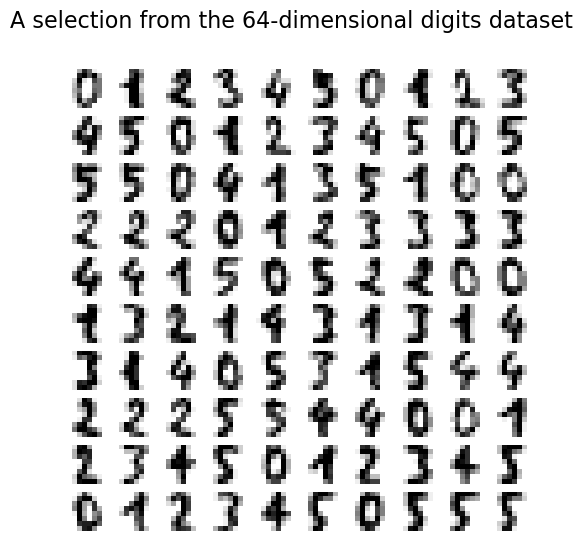

In [13]:
# Plot a selection from the digits dataset
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)


- The plot_embedding function visualizes embeddings by scattering data points for each digit, overlaying digit images as annotations. It utilizes MinMaxScaler to scale data and offsetbox.AnnotationBbox for embedding images.

In [14]:
# Define a function for plotting embeddings
def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

- The embeddings dictionary contains various techniques for embedding high-dimensional data into 2 dimensions for visualization, including Random Projection, Truncated SVD, Linear Discriminant Analysis, Isomap, Locally Linear Embedding (Standard, Modified, Hessian, LTSA), Multidimensional Scaling (MDS), Random Trees, Spectral Embedding, t-SNE, and Neighborhood Components Analysis (NCA). Each technique is initialized with specific parameters to perform the embedding.

In [15]:
# Define different embedding techniques
embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embedding": TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}


- This code block iterates over each embedding technique in the embeddings dictionary, computes the projection of the original data using the specified technique, and stores the resulting projections along with the computation time. If the embedding technique is Linear Discriminant Analysis, a small noise is added to the data to make it invertible. Finally, it plots the resulting projections for each method using the plot_embedding function and displays them using plt.show().

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...


C:\Users\ramit\anaconda\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embedding...
Computing NCA embedding...


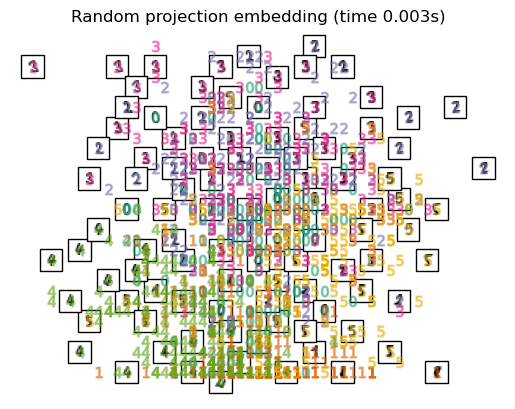

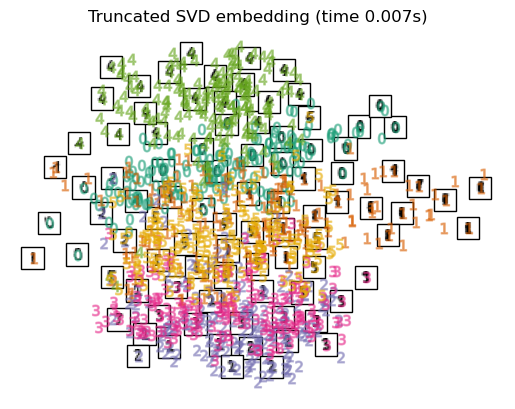

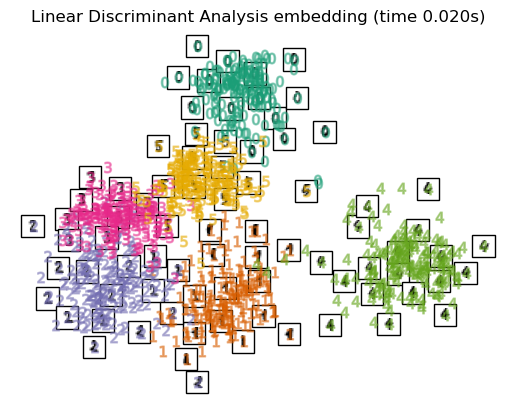

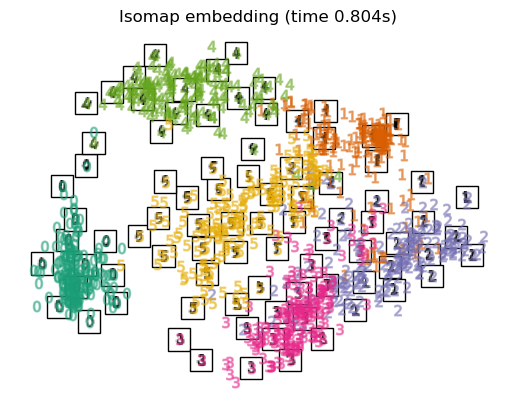

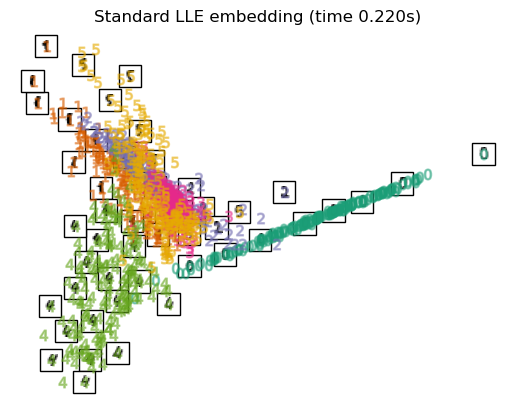

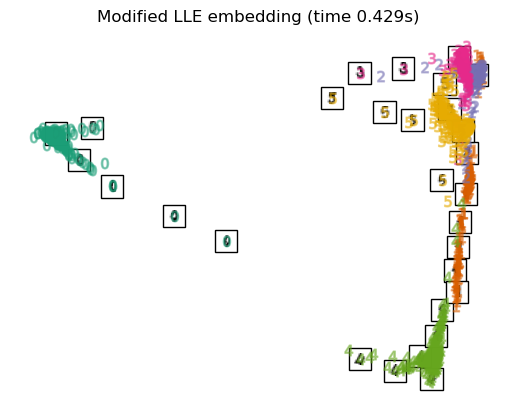

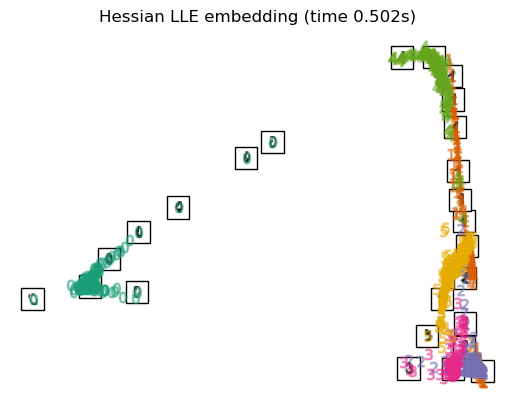

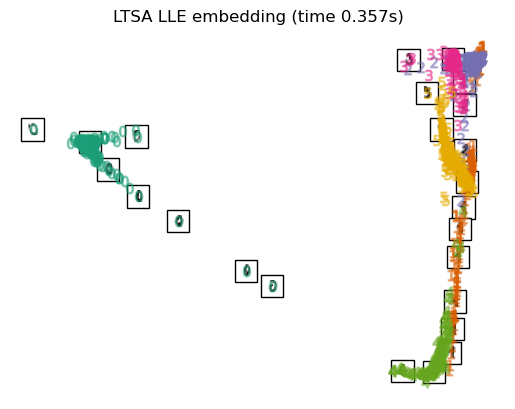

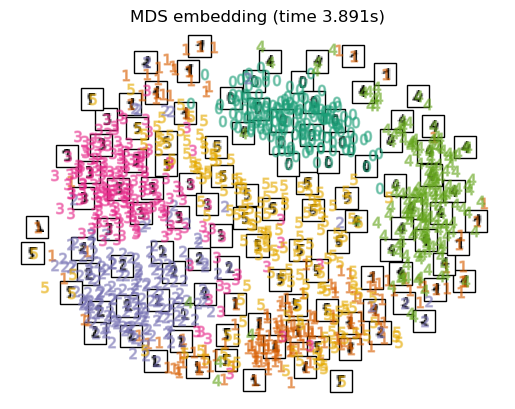

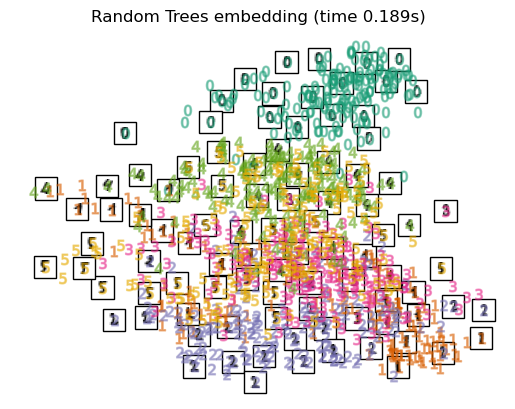

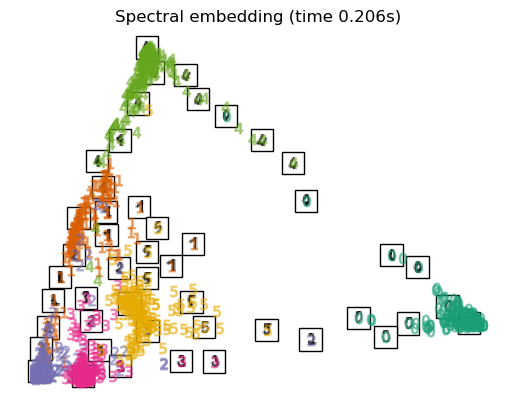

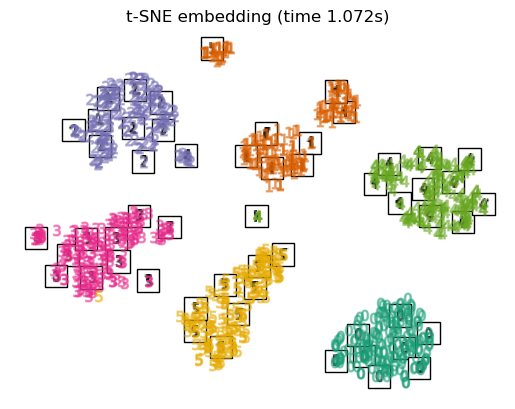

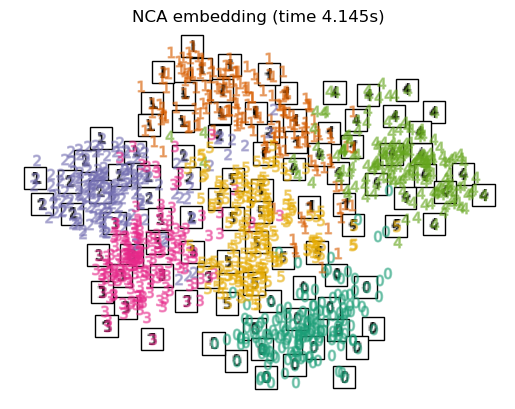

In [16]:
# Perform the projection of the original data
projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

# Plot the resulting projection for each method
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

#### Observations:
-  MDS tends to preserve the global structure of the data, trying to maintain the distances between data points in the high-dimensional space.
- Therefore, in the MDS visualization, data points that are close in the high-dimensional space remain close in the 2D projection.
- t-SNE focuses on preserving the local structure of the data, emphasizing clusters of similar data points.
- It achieves this by attempting to maintain the relative distances between neighboring data points.
- In the t-SNE visualization, you might see clearer separation between different clusters of data points compared to MDS.
- However, t-SNE is sensitive to the choice of hyperparameters and random initialization, so different runs of t-SNE may produce slightly different visualizations.